## Aula 08 - Redes Neurais Artificiais - Exemplo prático

Neste notebook, veremos um exemplo prático de redes neurais artificiais.

Usaremos o framework de código aberto PyTorch.

Leia as instruções e execute as células abaixo.

In [ ]:
#Instalando pytorch
#!pip install torch

In [ ]:
# Importações necessárias
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Definindo o dispositivo de processamento
device = ("cuda" if torch.cuda.is_available() else "cpu")

#### Gerando um dataset sintético

In [ ]:
x1 = np.random.randn(2000)*0.5+3
x2 = np.random.randn(2000)*0.5+2

x3 = np.random.randn(2000) *0.5 + 4
x4 = np.random.randn(2000) *0.5 + 5


X_1 = np.vstack([x1, x2])
X_2 = np.vstack([x3, x4])
X = np.hstack([X_1, X_2]).T

y = np.hstack([np.zeros(2000), np.ones(2000)])

print(X.shape)
print(y.shape)

(4000, 2)
(4000,)


Text(0, 0.5, 'Atributo 2')

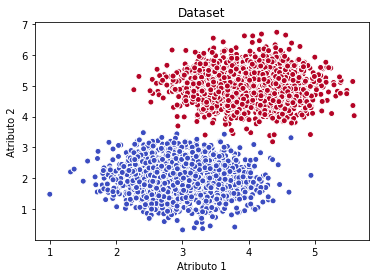

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm, edgecolors='w');
plt.title('Dataset')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')

In [ ]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# Convertendo de numpy para tensor
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train.squeeze()).type(torch.LongTensor)
y_test = torch.from_numpy(y_test.squeeze()).type(torch.LongTensor)

In [ ]:
# Verificando as dimensões
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([3200, 2])
torch.Size([800, 2])
torch.Size([3200])
torch.Size([800])


In [ ]:
class RedeNeuralArtificial(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(RedeNeuralArtificial, self).__init__()
        self.input = nn.Linear(input_num, hidden_num)
        self.hidden = nn.Linear(hidden_num, hidden_num) # Camada oculta
        self.output = nn.Linear(hidden_num, output_num) # Camada de saída
        self.sigmoid = nn.Sigmoid() # Função de ativação sigmoid
        self.relu = nn.ReLU() # Função de ativação ReLU
    
    def forward(self, x):
        x = self.relu(self.input(x))
        x = self.relu(self.hidden(x))
        return self.output(x)
    
    def predict(self, x):
        # Aplicando a função de ativação sigmoid
        predictions = self.sigmoid(self.forward(x))
        result = []
        # Selecionando a classe com maior probabilidade
        for current_value in predictions:
            if current_value[0] > current_value[1]:
                result.append(0)
            else:
                result.append(1)
        return result

In [ ]:
input_num = 2
hidden_num = 4
output_num = 2  #A dimensionalidade da saída é igual ao número de classes

model = RedeNeuralArtificial(input_num, hidden_num, output_num)
model.to(device)
print(model)

RedeNeuralArtificial(
  (input): Linear(in_features=2, out_features=4, bias=True)
  (hidden): Linear(in_features=4, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)


In [ ]:
# Definindo a função de perda e o otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [ ]:
# Transfere os dados para a GPU, caso disponível
if torch.cuda.is_available():
    X_train = Variable(X_train).cuda()
    y_train = Variable(y_train).cuda()
    X_test = Variable(X_test).cuda()
    y_test = Variable(y_test).cuda()

num_epochs = 1000 # Numero de épocas

for epoch in range(num_epochs):
    # forward propagation
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # back propagation
    optimizer.zero_grad() # Zera os gradientes para evitar acumulação
    loss.backward() # Calcula os gradientes
    optimizer.step() # Atualiza os pesos
    
    if epoch % 200 == 0:
        print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch, num_epochs, loss.item()))
print('\nTraining Complete')

Epoch [0/1000], Loss: 0.74580
Epoch [200/1000], Loss: 0.03471
Epoch [400/1000], Loss: 0.01189
Epoch [600/1000], Loss: 0.00694
Epoch [800/1000], Loss: 0.00496

Training Complete


In [ ]:
model_prediction = model.predict(X_test)

In [ ]:
X_test = X_test.cpu().numpy() # Converte o tensor para numpy
y_test = y_test.cpu().numpy()
model_prediction = np.array(model_prediction) # Converte a lista para numpy

In [ ]:
print(classification_report(model_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       412
           1       1.00      1.00      1.00       388

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Fonte do exemplo:
https://datahacker.rs/003-pytorch-shallow-neural-network-in-pytorch-1-5/